## First Example

In [12]:
import os
import sys
import requests
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from io import BytesIO

In [13]:
if 'COMPUTER_VISION_SUBSCRIPTION_KEY' in os.environ:
    subscription_key = os.environ['COMPUTER_VISION_SUBSCRIPTION_KEY']
else:
    print("\nSet the COMPUTER_VISION_SUBSCRIPTION_KEY environment variable.\n**Restart your shell or IDE for changes to take effect.**")
    sys.exit()

In [14]:
if 'COMPUTER_VISION_ENDPOINT' in os.environ:
    endpoint = os.environ['COMPUTER_VISION_ENDPOINT']

In [16]:
ocr_url = endpoint + "vision/v3.1/ocr"

## OCR On image retrieved via URL

In [15]:
image_url = "https://user-images.githubusercontent.com/2716202/102968699-5f950500-451a-11eb-84c4-cbc3bb3e886a.png"

In [ ]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'language': 'unk', 'detectOrientation': 'true'}
data = {'url': image_url}
response = requests.post(ocr_url, headers=headers, params=params, json=data)

response.raise_for_status()

analysis = response.json()

In [31]:
print(analysis)

{'language': 'en', 'textAngle': 0.0, 'orientation': 'Up', 'regions': [{'boundingBox': '56,114,494,326', 'lines': [{'boundingBox': '293,114,257,37', 'words': [{'boundingBox': '293,114,137,37', 'text': 'Infinite'}, {'boundingBox': '447,115,103,36', 'text': 'demo'}]}, {'boundingBox': '56,298,174,31', 'words': [{'boundingBox': '56,298,87,31', 'text': 'Python'}, {'boundingBox': '153,298,77,24', 'text': 'MsOcr'}]}, {'boundingBox': '56,383,281,26', 'words': [{'boundingBox': '56,383,281,26', 'text': 'python.msocr@domain.com'}]}, {'boundingBox': '56,420,111,20', 'words': [{'boundingBox': '56,420,65,20', 'text': 'Online'}, {'boundingBox': '129,420,38,20', 'text': 'POC'}]}]}, {'boundingBox': '636,337,156,108', 'lines': [{'boundingBox': '636,337,156,20', 'words': [{'boundingBox': '636,337,156,20', 'text': '+91-789123456'}]}, {'boundingBox': '654,384,134,21', 'words': [{'boundingBox': '654,384,74,20', 'text': 'Infinite'}, {'boundingBox': '735,384,53,21', 'text': 'demo'}]}, {'boundingBox': '708,420,

## Formatted JSON
```
{
  "language": "en",
  "textAngle": 0.0,
  "orientation": "Up",
  "regions": [
    {
      "boundingBox": "56,114,494,326",
      "lines": [
        {
          "boundingBox": "293,114,257,37",
          "words": [
            { "boundingBox": "293,114,137,37", "text": "Infinite" },
            { "boundingBox": "447,115,103,36", "text": "demo" }
          ]
        },
        {
          "boundingBox": "56,298,174,31",
          "words": [
            { "boundingBox": "56,298,87,31", "text": "Python" },
            { "boundingBox": "153,298,77,24", "text": "MsOcr" }
          ]
        },
        {
          "boundingBox": "56,383,281,26",
          "words": [
            {
              "boundingBox": "56,383,281,26",
              "text": "python.msocr@domain.com"
            }
          ]
        },
        {
          "boundingBox": "56,420,111,20",
          "words": [
            { "boundingBox": "56,420,65,20", "text": "Online" },
            { "boundingBox": "129,420,38,20", "text": "POC" }
          ]
        }
      ]
    },
    {
      "boundingBox": "636,337,156,108",
      "lines": [
        {
          "boundingBox": "636,337,156,20",
          "words": [
            { "boundingBox": "636,337,156,20", "text": "+91-789123456" }
          ]
        },
        {
          "boundingBox": "654,384,134,21",
          "words": [
            { "boundingBox": "654,384,74,20", "text": "Infinite" },
            { "boundingBox": "735,384,53,21", "text": "demo" }
          ]
        },
        {
          "boundingBox": "708,420,83,25",
          "words": [{ "boundingBox": "708,420,83,25", "text": "youtube" }]
        }
      ]
    }
  ]
}
```

In [29]:
# Extract the word bounding boxes and text.
line_infos = [region["lines"] for region in analysis["regions"]]
line_infos

[[{'boundingBox': '293,114,257,37',
   'words': [{'boundingBox': '293,114,137,37', 'text': 'Infinite'},
    {'boundingBox': '447,115,103,36', 'text': 'demo'}]},
  {'boundingBox': '56,298,174,31',
   'words': [{'boundingBox': '56,298,87,31', 'text': 'Python'},
    {'boundingBox': '153,298,77,24', 'text': 'MsOcr'}]},
  {'boundingBox': '56,383,281,26',
   'words': [{'boundingBox': '56,383,281,26',
     'text': 'python.msocr@domain.com'}]},
  {'boundingBox': '56,420,111,20',
   'words': [{'boundingBox': '56,420,65,20', 'text': 'Online'},
    {'boundingBox': '129,420,38,20', 'text': 'POC'}]}],
 [{'boundingBox': '636,337,156,20',
   'words': [{'boundingBox': '636,337,156,20', 'text': '+91-789123456'}]},
  {'boundingBox': '654,384,134,21',
   'words': [{'boundingBox': '654,384,74,20', 'text': 'Infinite'},
    {'boundingBox': '735,384,53,21', 'text': 'demo'}]},
  {'boundingBox': '708,420,83,25',
   'words': [{'boundingBox': '708,420,83,25', 'text': 'youtube'}]}]]

In [28]:
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

[{'boundingBox': '293,114,137,37', 'text': 'Infinite'},
 {'boundingBox': '447,115,103,36', 'text': 'demo'},
 {'boundingBox': '56,298,87,31', 'text': 'Python'},
 {'boundingBox': '153,298,77,24', 'text': 'MsOcr'},
 {'boundingBox': '56,383,281,26', 'text': 'python.msocr@domain.com'},
 {'boundingBox': '56,420,65,20', 'text': 'Online'},
 {'boundingBox': '129,420,38,20', 'text': 'POC'},
 {'boundingBox': '636,337,156,20', 'text': '+91-789123456'},
 {'boundingBox': '654,384,74,20', 'text': 'Infinite'},
 {'boundingBox': '735,384,53,21', 'text': 'demo'},
 {'boundingBox': '708,420,83,25', 'text': 'youtube'}]

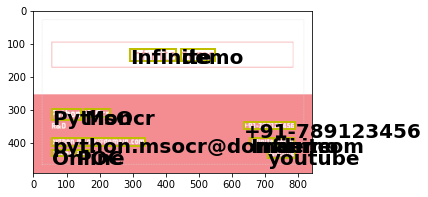

(0.0, 1.0, 0.0, 1.0)

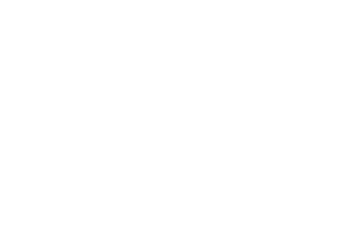

In [27]:
# Display the image and overlay it with the extracted text.
plt.figure(figsize=(5, 5))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image, alpha=0.5)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch = Rectangle(origin, bbox[2], bbox[3],
                      fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
plt.axis("off")
plt.show()

## OCR On image stored on disk

In [18]:
image_path = './demoIdCard.png'

In [ ]:
# Read the image into a byte array
image_data = open(image_path, "rb").read()
# Set Content-Type to octet-stream
headers = {'Ocp-Apim-Subscription-Key': subscription_key, 'Content-Type': 'application/octet-stream'}
params = {'language': 'unk', 'detectOrientation': 'true'}
# put the byte array into your post request
response = requests.post(ocr_url, headers=headers, params=params, data = image_data)

response.raise_for_status()

analysis = response.json()

In [26]:
analysis

{'language': 'en',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '56,114,494,326',
   'lines': [{'boundingBox': '293,114,257,37',
     'words': [{'boundingBox': '293,114,137,37', 'text': 'Infinite'},
      {'boundingBox': '447,115,103,36', 'text': 'demo'}]},
    {'boundingBox': '56,298,174,31',
     'words': [{'boundingBox': '56,298,87,31', 'text': 'Python'},
      {'boundingBox': '153,298,77,24', 'text': 'MsOcr'}]},
    {'boundingBox': '56,383,281,26',
     'words': [{'boundingBox': '56,383,281,26',
       'text': 'python.msocr@domain.com'}]},
    {'boundingBox': '56,420,111,20',
     'words': [{'boundingBox': '56,420,65,20', 'text': 'Online'},
      {'boundingBox': '129,420,38,20', 'text': 'POC'}]}]},
  {'boundingBox': '636,337,156,108',
   'lines': [{'boundingBox': '636,337,156,20',
     'words': [{'boundingBox': '636,337,156,20', 'text': '+91-789123456'}]},
    {'boundingBox': '654,384,134,21',
     'words': [{'boundingBox': '654,384,74,20', 'text': 'Infinit

## Formatted JSON
```
{
  "language": "en",
  "textAngle": 0.0,
  "orientation": "Up",
  "regions": [
    {
      "boundingBox": "56,114,494,326",
      "lines": [
        {
          "boundingBox": "293,114,257,37",
          "words": [
            { "boundingBox": "293,114,137,37", "text": "Infinite" },
            { "boundingBox": "447,115,103,36", "text": "demo" }
          ]
        },
        {
          "boundingBox": "56,298,174,31",
          "words": [
            { "boundingBox": "56,298,87,31", "text": "Python" },
            { "boundingBox": "153,298,77,24", "text": "MsOcr" }
          ]
        },
        {
          "boundingBox": "56,383,281,26",
          "words": [
            {
              "boundingBox": "56,383,281,26",
              "text": "python.msocr@domain.com"
            }
          ]
        },
        {
          "boundingBox": "56,420,111,20",
          "words": [
            { "boundingBox": "56,420,65,20", "text": "Online" },
            { "boundingBox": "129,420,38,20", "text": "POC" }
          ]
        }
      ]
    },
    {
      "boundingBox": "636,337,156,108",
      "lines": [
        {
          "boundingBox": "636,337,156,20",
          "words": [
            { "boundingBox": "636,337,156,20", "text": "+91-789123456" }
          ]
        },
        {
          "boundingBox": "654,384,134,21",
          "words": [
            { "boundingBox": "654,384,74,20", "text": "Infinite" },
            { "boundingBox": "735,384,53,21", "text": "demo" }
          ]
        },
        {
          "boundingBox": "708,420,83,25",
          "words": [{ "boundingBox": "708,420,83,25", "text": "youtube" }]
        }
      ]
    }
  ]
}
```

In [23]:
# Extract the word bounding boxes and text.
line_infos = [region["lines"] for region in analysis["regions"]]
line_infos

[[{'boundingBox': '293,114,257,37',
   'words': [{'boundingBox': '293,114,137,37', 'text': 'Infinite'},
    {'boundingBox': '447,115,103,36', 'text': 'demo'}]},
  {'boundingBox': '56,298,174,31',
   'words': [{'boundingBox': '56,298,87,31', 'text': 'Python'},
    {'boundingBox': '153,298,77,24', 'text': 'MsOcr'}]},
  {'boundingBox': '56,383,281,26',
   'words': [{'boundingBox': '56,383,281,26',
     'text': 'python.msocr@domain.com'}]},
  {'boundingBox': '56,420,111,20',
   'words': [{'boundingBox': '56,420,65,20', 'text': 'Online'},
    {'boundingBox': '129,420,38,20', 'text': 'POC'}]}],
 [{'boundingBox': '636,337,156,20',
   'words': [{'boundingBox': '636,337,156,20', 'text': '+91-789123456'}]},
  {'boundingBox': '654,384,134,21',
   'words': [{'boundingBox': '654,384,74,20', 'text': 'Infinite'},
    {'boundingBox': '735,384,53,21', 'text': 'demo'}]},
  {'boundingBox': '708,420,83,25',
   'words': [{'boundingBox': '708,420,83,25', 'text': 'youtube'}]}]]

In [24]:
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

[{'boundingBox': '293,114,137,37', 'text': 'Infinite'},
 {'boundingBox': '447,115,103,36', 'text': 'demo'},
 {'boundingBox': '56,298,87,31', 'text': 'Python'},
 {'boundingBox': '153,298,77,24', 'text': 'MsOcr'},
 {'boundingBox': '56,383,281,26', 'text': 'python.msocr@domain.com'},
 {'boundingBox': '56,420,65,20', 'text': 'Online'},
 {'boundingBox': '129,420,38,20', 'text': 'POC'},
 {'boundingBox': '636,337,156,20', 'text': '+91-789123456'},
 {'boundingBox': '654,384,74,20', 'text': 'Infinite'},
 {'boundingBox': '735,384,53,21', 'text': 'demo'},
 {'boundingBox': '708,420,83,25', 'text': 'youtube'}]

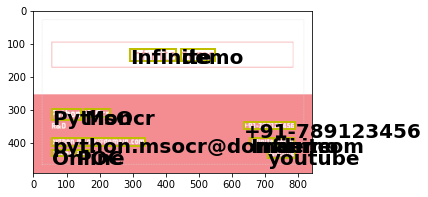

(0.0, 1.0, 0.0, 1.0)

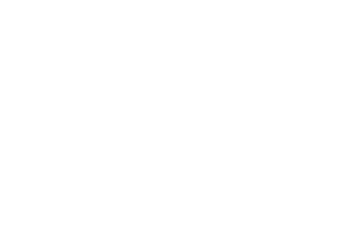

In [25]:
# Display the image and overlay it with the extracted text.
plt.figure(figsize=(5, 5))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image, alpha=0.5)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch = Rectangle(origin, bbox[2], bbox[3],
                      fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
plt.axis("off")
plt.show()